In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', family='NanumGothic')
matplotlib.rc('axes', unicode_minus=False)
%matplotlib inline

## 모든 고객의 물품 구매 순서 및 리스트

In [4]:
df_sale = pd.read_csv('./data/new_sales4.csv', encoding='euc-kr')
df_member = pd.read_csv('./data/Member_data4.csv', encoding='euc-kr')

In [5]:
df = pd.merge(df_sale, df_member, on='고객번호')

### 기저귀의 매출 기여율

In [ ]:
print (sum(df2['물품대분류'].isin(['1단계', '2단계', '3단계', '4단계', '5단계', '6단계', '7단계']))/len(df2))
df2[df2['물품대분류'].isin(['1단계', '2단계', '3단계', '4단계', '5단계', '6단계', '7단계'])]['결제금액'].sum()/df2['결제금액'].sum()

### 지역별 물품 구매 횟수

In [10]:
def change_area(x):
    # 충청
    if x == '충남':
        return ('충청')
    if x == '충북':
        return ('충청')
    # 경북
    if x == '경북':
        return ('경상')
    if x == '경남':
        return ('경상')
    
    # 전라
    if x == '전북':
        return ('전라')
    if x == '전남':
        return ('전라')
    
    return (x)

df['거주지역'] = df['거주지역'].apply(lambda x:change_area(x))

In [11]:
# 남,북 합쳐서 계산함이 좋을듯
df2 = pd.concat([df.groupby('거주지역')['주문번호'].count(), df.groupby('거주지역')['결제금액'].sum()], axis=1).sort_values(by='주문번호', ascending=False)
df2

,주문번호,결제금액
거주지역,,
경기,44221,954251439
충청,41804,890514390
서울,38911,821616727
부산,20129,425948915
강원,19449,413938173
경상,18468,382747887
전라,12526,270654472
인천,10780,225310834
대전,9753,205896604


In [13]:
인구 = [9657, 3381, 2437, 2952, 1489, 1503, 1146, 13241, 1520, 1629 + 2189, 1812 + 1793, 2671+3350, 664]
지역 = ["서울","부산","대구","인천","광주","대전","울산","경기","강원","충청","전라","경상","제주"]

df_new = pd.merge(df2, pd.DataFrame({'거주지역':지역, '인구':인구}).sort_values(by='인구', ascending=False), on='거주지역')
df_new.to_csv('./data/지역별결제금액및인구.csv', encoding='euc-kr', index=False)

In [52]:
df2 = df[df['거주지역'].isin(['경상', '충청', '강원', '서울'])]

In [68]:
df3 = pd.DataFrame(df2.groupby('거주지역')['물품대분류'].value_counts())
df3.head()

물품대분류
거주지역 물품대분류       
강원   이벤트     2958
     수유용품    2182
     티슈      1943
     3단계     1715
     4단계     1436

In [72]:
df3 = df3.rename(columns={'물품대분류':'수량'}).reset_index()
df3.head()

,거주지역,물품대분류,수량
0,강원,이벤트,2958
1,강원,수유용품,2182
2,강원,티슈,1943
3,강원,3단계,1715
4,강원,4단계,1436


In [83]:
tmp = df3.groupby('거주지역').sum()
tmp

,수량
거주지역,
강원,16790
경상,15785
서울,33621
충청,36013


In [100]:
def area_percent(x, df2):
    return (x['수량']/tmp[tmp.index == x['거주지역']]['수량'][0])

In [102]:
df3['비율'] = df3.apply(lambda x:area_percent(x, tmp), axis=1)

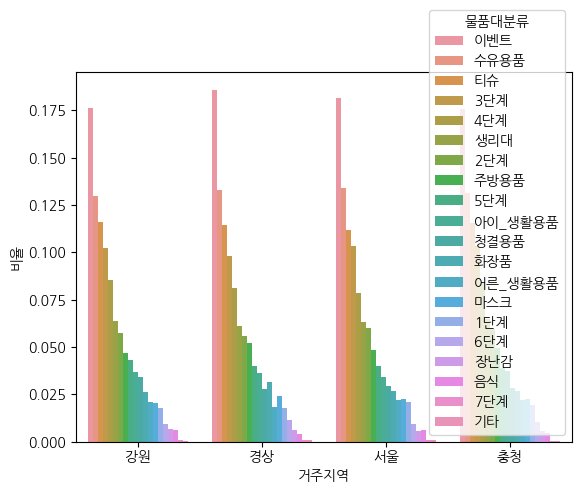

In [104]:
g = sns.barplot(data=df3, x='거주지역', y='비율', hue='물품대분류')
# g.legend_.remove()

## RFM별 VIP들의 물품구매

In [106]:
df.columns

Index(['주문번호', '구매일', '배송시작일', '배송완료일', '구매시월령(수정)', '고객번호', '구매금액', '결제금액',
       '물품대분류', '상품명', '수량추정', '구매월', '할인율', '성별', '결혼유무', '거주지역', '연령',
       '결제등록카드', '유입경로', '자녀여부', 'recendancy', 'frequency', 'monetary', 'rfm',
       '총구매금액'],
      dtype='object')

In [123]:
df2 = df[df['물품대분류'] != '이벤트']

<AxesSubplot:xlabel='물품대분류'>

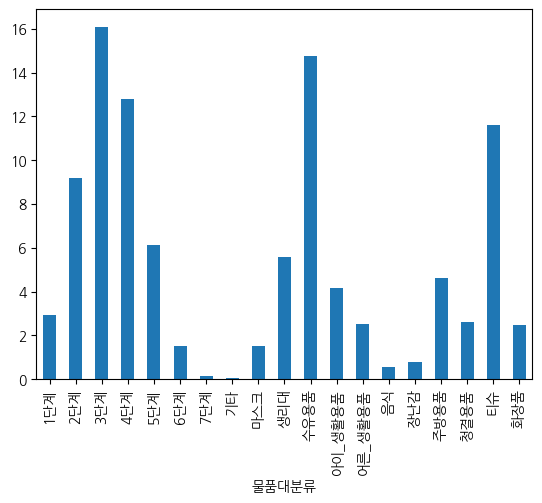

In [145]:
((df2[df2['rfm'] > 3].groupby('물품대분류')['주문번호'].count()/len(df2[df2['rfm'] > 3]))*100).plot.bar()

<AxesSubplot:xlabel='물품대분류'>

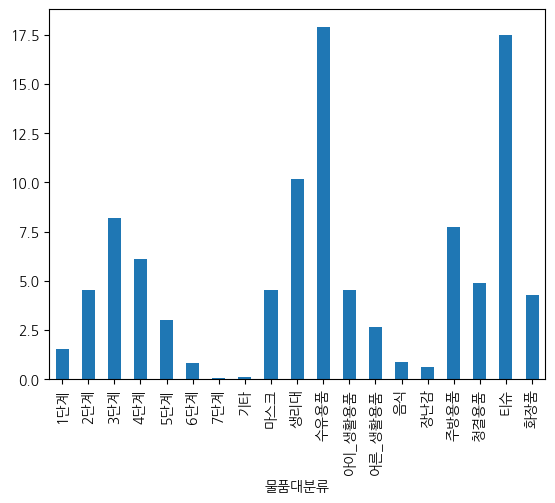

In [148]:
((df2[df2['rfm'] <= 3].groupby('물품대분류')['주문번호'].count()/len(df2[df2['rfm'] <= 3]))*100).plot.bar()

충성고객의 경우 정기적 물품(기저귀)의 구매 빈도가 높다.

=> 정기적 물품만 이벤트를 주고 비정기적 물품은 주지말자..

In [150]:
df3 = df2[df2['rfm'] > 3]

In [159]:
df4 = df3.loc[df3['구매시월령(수정)'].dropna().index]

## 배송

In [176]:
df.apply(lambda x:np.datetime64(x['배송시작일'],'D') - np.datetime64(x['구매일'], 'D'), axis=1).dt.days

count    199516.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
dtype: float64

In [169]:
df['배송기간'] = df.apply(lambda x:np.datetime64(x['배송완료일'],'D') - np.datetime64(x['구매일'], 'D'), axis=1).dt.days

In [182]:
df2 = df[df['배송기간'] >= 4][['구매일', '배송기간']]

In [189]:
df2['구매일'] = df2['구매일'].astype('datetime64[ns]')

<AxesSubplot:xlabel='구매일', ylabel='배송기간'>

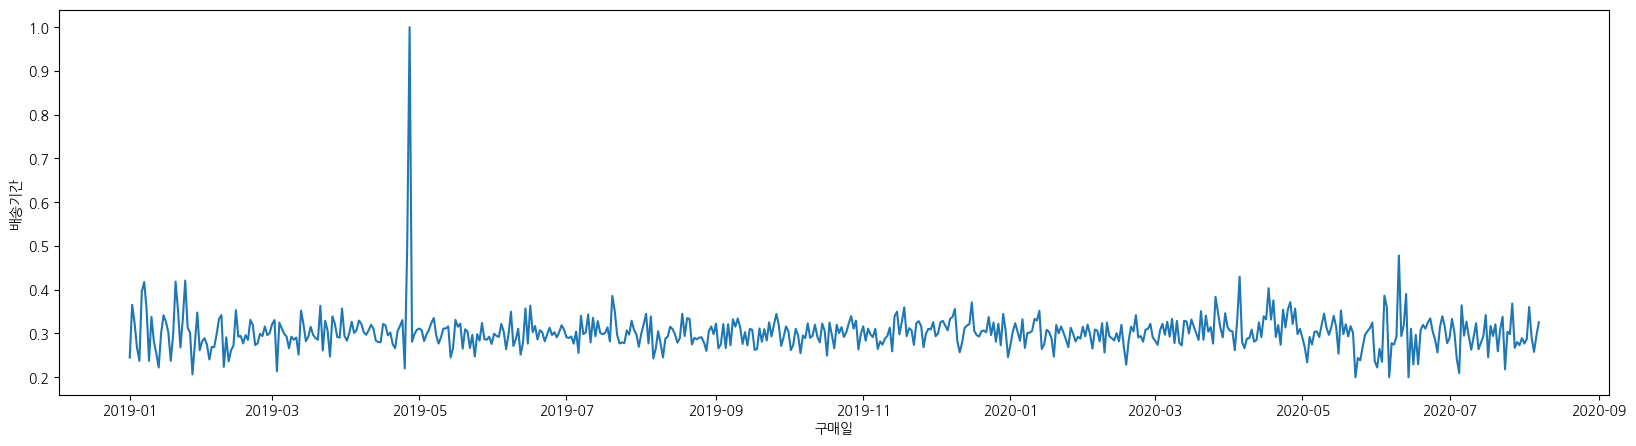

In [316]:
plt.figure(figsize=(20,5))
sns.lineplot(
    data = (df.loc[df2.index].groupby('구매일')['배송기간'].count()/df[df['구매일'].isin(df2['구매일'])].groupby('구매일')['배송기간'].count()).reset_index(),
    x='구매일',
    y='배송기간'
)

<AxesSubplot:xlabel='구매일', ylabel='배송기간'>

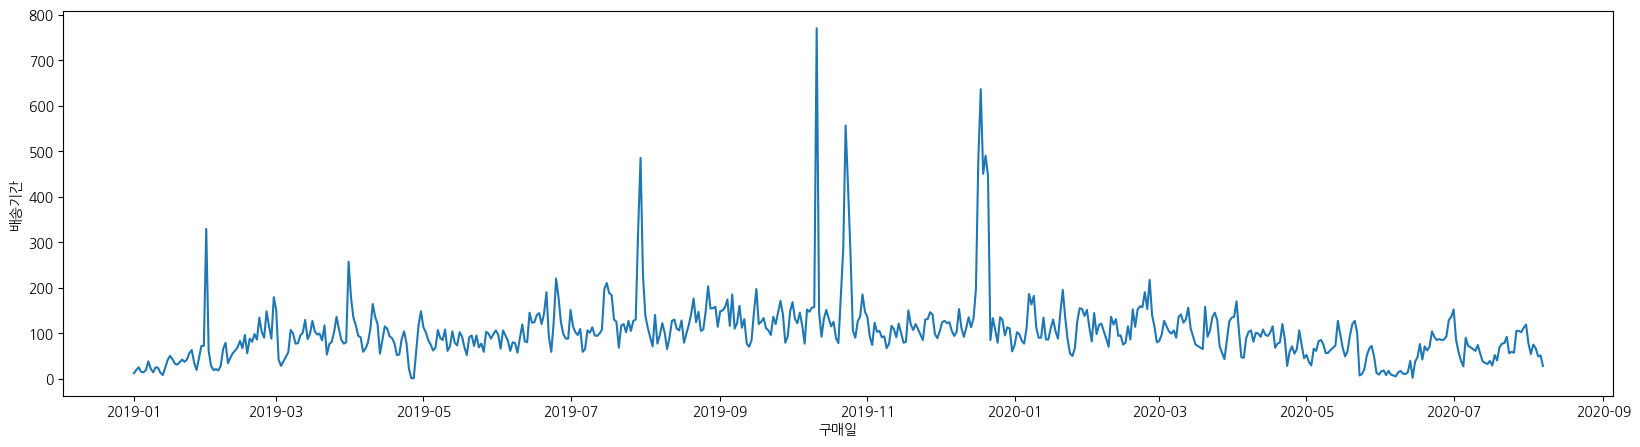

In [271]:
plt.figure(figsize=(20,5))
sns.lineplot(
    data=df2.groupby('구매일').count().reset_index(),
    x='구매일',
    y='배송기간')

<AxesSubplot:xlabel='구매일', ylabel='배송기간'>

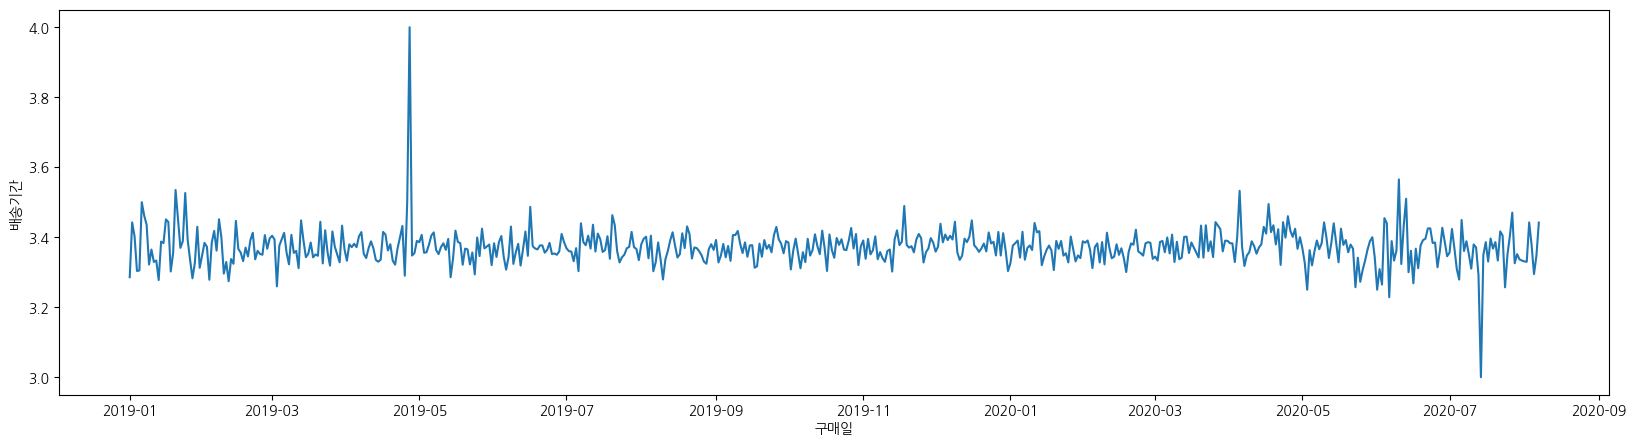

In [203]:
df['구매일'] = df['구매일'].apply(lambda x:np.datetime64(x, 'D'))

plt.figure(figsize=(20,5))
sns.lineplot(
    data = df.groupby('구매일')['배송기간'].mean().reset_index(),
    x='구매일',
    y='배송기간')

In [205]:
df2

,구매일,배송기간
0,2019-05-06,5
2,2019-02-28,5
5,2019-07-29,4
15,2019-04-29,5
21,2020-04-25,5
...,...,...
199504,2020-04-06,4
199505,2020-07-07,4
199506,2020-07-07,4
199514,2019-12-29,4


In [206]:
df_old = df[df['배송기간'] >= 4]

In [226]:
df['상품명'].value_counts()[(df_old['상품명'].value_counts()/df['상품명'].value_counts()) > 0.4]

(1+1) 좋은느낌 입는 오버나이트 대형 8개입                          0.428571
(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA)                    0.481481
(1번세트/증정) 더블하트 레스랩 유아용 섬유세제 50ml (EA)               1.000000
(증정) 레드투래드 안티더스트 클렌징 폼 20ml (EA)                    0.500000
(하기스위크) 하기스 샘플러 3단계 남아(밴드형) 3종 + 매직팬티 컴포트 20매 증정    0.500000
                                                      ...   
화이트 입는 오버나이트 대형 L 8개입 X2                            0.500000
화이트 입는 오버나이트 중형 M 8개입 X2                            0.750000
화이트 클린 울트라슬림 날개 대형 17개입                             0.666667
화이트 클린 울트라슬림 날개 중형 19개입                             0.416667
화이트 탐폰 오가닉 슈퍼 14개입                                  0.500000
Name: 상품명, Length: 653, dtype: float64

In [234]:
df_old['거주지역'].value_counts()/df['거주지역'].value_counts()

경기    0.301239
충청    0.301336
서울    0.296273
부산    0.302776
강원    0.300000
경상    0.301552
전라    0.298410
인천    0.304856
대전    0.307132
대구    0.305482
광주    0.296110
제주    0.303903
Name: 거주지역, dtype: float64

- 출고기간은 1일로 모두가 같다. 
- 총 배송이 4일이상걸린 경우가 30%

### 4일이상 배송이 걸린 후 다음 구매까지 기간

In [238]:
df_fre = df.groupby('고객번호')['구매일'].apply(list).reset_index()

In [258]:
np.datetime64(x['배송완료일'], 'D')

numpy.datetime64('2019-05-11')

In [329]:
df_fre[df_fre['고객번호'] == df_old.iloc[0]['고객번호']]['구매일'].values[0] > np.datetime64(x['배송완료일'], 'D')

/tmp/ipykernel_27614/2458796112.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


array([False,  True])

In [330]:
def check_delivery(x, df_fre):
    if x['배송완료일'] > '2020-05':
        return (None)
    date_list = df_fre[df_fre['고객번호'] == x['고객번호']]['구매일'].values[0]
    if sum(np.datetime64(x['배송완료일'], 'D') < date_list) > 0:
        return (True)
    else:
        return (False)

In [637]:
tmp = df_old.groupby('고객번호')['배송완료일'].max().reset_index()

In [651]:
tmp['return'] = tmp.apply(lambda x:check_delivery(x,df_fre), axis=1)

/tmp/ipykernel_27614/1985302426.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


In [683]:
tmp2 = df[df['배송기간'] == 3].groupby('고객번호')['배송완료일'].max().reset_index()

In [684]:
tmp2['return'] = tmp2.apply(lambda x:check_delivery(x,df_fre), axis=1)

/tmp/ipykernel_27614/1985302426.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


In [688]:
print (tmp['return'].value_counts()/len(tmp))
print (tmp2['return'].value_counts()/len(tmp2))


False    0.578397
True     0.286747
Name: return, dtype: float64
False    0.740778
True     0.107881
Name: return, dtype: float64


= 배송은 그 어떤 경우에도 의미없다 !!

## 신규고객 물품구매

In [491]:
def test1(x):
    if x['상품명'] == '맘큐 허그박스':
        return ('맘큐')
    else:
        return (x['물품대분류'])

In [495]:
df['물품대분류'] = df.apply(lambda x:test1(x), axis=1)

In [496]:
df2 = df.groupby('고객번호')['물품대분류'].apply(list).reset_index()

### 연관분석

In [4]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [6]:
df2 = df[df['rfm'] > 3].groupby('고객번호')['상품명'].apply(list).reset_index()

In [7]:
te = TransactionEncoder()
te_ary = te.fit(df2['상품명']).transform(df2['상품명'])

In [8]:
df3 = pd.DataFrame(te_ary, columns=te.columns_)

In [13]:
frequent_itemsets = apriori(df3, min_support=0.01, use_colnames=True)

In [14]:
frequent_itemsets

,support,itemsets
0,0.013615,(2020 하기스 매직 컴포트 2단계 공용 246매(밴드형))
1,0.027277,(2020 하기스 매직 컴포트 3단계 공용 180매(밴드형))
2,0.024921,(2020 하기스 매직 컴포트 3단계 공용 20매(밴드형/체험팩))
3,0.011448,(2020 하기스 매직 컴포트 4단계 공용 150매(밴드형))
4,0.014698,(2020 하기스 매직팬티 컴포트 3단계 남아 20매(팬티형/체험팩))
...,...,...
97,0.011448,(하기스 수딩케어 물티슈 캡형 64매X10팩)
98,0.011353,"(더블하트 SofTouch 모유실감 젖꼭지 M (2입), 더블하트 SofTouch ..."
99,0.010317,"(하기스 네이처메이드 1단계 공용 186매(밴드형), 하기스 네이처메이드 2단계 여..."
100,0.016112,"(하기스 네이처메이드 3단계 남아 132매(밴드형), 하기스 네이처메이드 2단계 남..."


In [15]:
#.to_csv('./data/association.csv', encoding='euc-kr', index=False)
association_rules(frequent_itemsets, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(더블하트 SofTouch 모유실감 젖꼭지 M (2입)),(더블하트 SofTouch 모유실감 젖꼭지 L (2입)),0.060253,0.062091,0.011353,0.188428,3.034728,0.007612,1.155670
1,(더블하트 SofTouch 모유실감 젖꼭지 L (2입)),(더블하트 SofTouch 모유실감 젖꼭지 M (2입)),0.062091,0.060253,0.011353,0.182853,3.034728,0.007612,1.150033
2,(하기스 네이처메이드 1단계 공용 186매(밴드형)),(하기스 네이처메이드 2단계 여아 156매(밴드형)),0.053375,0.088472,0.010317,0.193292,2.184778,0.005595,1.129935
3,(하기스 네이처메이드 2단계 여아 156매(밴드형)),(하기스 네이처메이드 1단계 공용 186매(밴드형)),0.088472,0.053375,0.010317,0.116613,2.184778,0.005595,1.071586
4,(하기스 네이처메이드 3단계 남아 132매(밴드형)),(하기스 네이처메이드 2단계 남아 156매(밴드형)),0.065106,0.080840,0.016112,0.247467,3.061184,0.010848,1.221422
5,(하기스 네이처메이드 2단계 남아 156매(밴드형)),(하기스 네이처메이드 3단계 남아 132매(밴드형)),0.080840,0.065106,0.016112,0.199301,3.061184,0.010848,1.167597
6,(하기스 네이처메이드 3단계 여아 132매(밴드형)),(하기스 네이처메이드 2단계 여아 156매(밴드형)),0.072502,0.088472,0.019692,0.271605,3.069946,0.013277,1.251419
7,(하기스 네이처메이드 2단계 여아 156매(밴드형)),(하기스 네이처메이드 3단계 여아 132매(밴드형)),0.088472,0.072502,0.019692,0.222577,3.069946,0.013277,1.193042


= 연관분석 결과 특별한 유의점을 발견할 수 없었음.

In [701]:
df_mem = pd.read_csv('./data/Member_data3.csv', encoding='euc-kr')

In [709]:
df_mem.groupby('거주지역')['rfm'].mean()

거주지역
강원    2.578659
경기    2.583355
경남    2.551838
경북    2.547860
광주    2.595420
대구    2.538115
대전    2.585784
부산    2.589024
서울    2.576738
인천    2.552720
전남    2.586377
전북    2.585079
제주    2.567246
충남    2.543157
충북    2.574516
Name: rfm, dtype: float64

In [791]:
tmp_drop = df.dropna().groupby('고객번호')['구매시월령(수정)'].count().index

In [792]:
tmp_nodrop = df[df['구매시월령(수정)'].isna()].groupby('고객번호').count().index

In [798]:
tmp2 = tmp_drop[tmp_drop.isin(tmp_nodrop)]

152명의 고객은 월령을 유추할 수 있다.

In [804]:
df[df['고객번호'].isin(tmp2)].to_csv('./data/월령.csv', encoding='euc-kr')

In [815]:
df_mem.columns

Index(['고객번호', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부',
       'recendancy', 'frequency', 'monetary', 'rfm', '총구매금액'],
      dtype='object')

# 고객 분류모델 만들기

## 이탈율 라벨링 하기

고객 가입정보(개인정보, 유입경로 등), 첫 구매시 월령, 첫 구매까지 걸린 시간, 첫 구매 물품, 3개월 이내 재 구매여부

In [817]:
df_sale = pd.read_csv('./data/new_sales4.csv', encoding='euc-kr')
df_mem = pd.read_csv('./data/Member_data3.csv', encoding='euc-kr')

In [847]:
tmp = df_sale.groupby('고객번호')['주문번호'].min().apply(lambda x:x[:8]).reset_index()

In [829]:
df_mem = pd.merge(df_mem, tmp, on='고객번호').rename(columns={'주문번호':'첫주문일'})

In [836]:
df_mem['가입일'] = df_mem['고객번호'].apply(lambda x:str(x)[:8])

In [843]:
df_mem['첫주문까지일'] = (df_mem['첫주문일'].astype('datetime64[ns]') - df_mem['가입일'].astype('datetime64[ns]')).dt.days

In [850]:
tmp = df_sale.groupby('고객번호')['주문번호'].min()

In [860]:
df_mem = pd.merge(df_mem, df[df['주문번호'].isin(tmp.values)][['고객번호', '물품대분류']], on='고객번호')

In [890]:
df_fre = df_sale.groupby('고객번호')['구매일'].apply(list).reset_index()

In [895]:
type(df_fre['구매일'][0][0])

str

In [904]:
date_list = df_fre[df_fre['고객번호'] == x['고객번호']]['구매일'].values[0]

In [912]:
df_mem['첫주문일'] = df_mem['첫주문일'].apply(lambda x:str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[6:8])

In [945]:
# 0 = 완전 이탈 / 1 = 재구매 / 2 = 이후 복귀
def check_chun(x, interval, df_fre):
    deadline = np.datetime64(x['첫주문일'], 'D') + interval
    date_list = df_fre[df_fre['고객번호'] == x['고객번호']]['구매일'].values[0]
    date_list = list(map(lambda x:np.datetime64(x, 'D'), date_list))
    
    if sum((np.datetime64(x['첫주문일'], 'D') < date_list) & (date_list <= deadline)) > 0:
        return 1
    else:
        if sum(deadline < date_list) > 0:
            return 2
        return 0

In [946]:
df_mem['chun'] = df_mem.apply(lambda x:check_chun(x, 90, df_fre), axis=1)

In [947]:
df_mem['chun'].value_counts()

1    56286
0    26968
2     5767
Name: chun, dtype: int64

In [953]:
tmp = df_sale.groupby('고객번호').min()['결제금액'].reset_index()
tmp = tmp.rename(columns = {'결제금액' : '첫결제금액'})
df_mem = pd.merge(df_mem, tmp, on='고객번호')

In [958]:
df_mem.to_csv('./data/Member_data4.csv', encoding='euc-kr', index=False)

In [959]:
df_mem.columns

Index(['고객번호', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부',
       'recendancy', 'frequency', 'monetary', 'rfm', '총구매금액', '첫주문일', '가입일',
       '첫주문까지일', '물품대분류', 'chun', '첫결제금액'],
      dtype='object')

In [960]:
df_mem

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,recendancy,frequency,monetary,rfm,총구매금액,첫주문일,가입일,첫주문까지일,물품대분류,chun,첫결제금액
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,0.4,0.2,0.4,2,54083,2019-05-05,20181231,125,수유용품,1,16314
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,0.0,0.2,0.2,1,3800,2019-02-28,20181231,59,티슈,0,3800
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,0.0,0.2,0.4,1,47922,2019-05-13,20181231,133,3단계,0,47922
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,1.0,0.2,0.6,5,116532,2019-05-09,20181231,129,3단계,1,39788
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,0.0,0.2,0.2,1,19900,2019-01-30,20181231,30,이벤트,0,19900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89016,201912281058004,여,미혼,부산,30.0,국민은행,인스타그램,No,0.6,0.2,0.2,2,9351,2019-12-28,20191228,0,이벤트,1,9351
89017,201912281058006,여,기혼,충남,34.0,우리은행,검색광고,Yes,0.2,0.2,0.2,1,8900,2019-12-28,20191228,0,맘큐,1,3000
89018,201912281058007,여,기혼,대전,29.0,농협회원조합,인스타그램,Yes,0.6,0.2,0.4,3,52065,2019-12-28,20191228,0,아이_생활용품,1,52065
89019,201912281058011,여,기혼,충북,31.0,국민은행,인스타그램,Yes,0.4,0.2,0.2,2,7524,2020-04-10,20191228,104,이벤트,0,7524
